In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import seaborn as sns

In [2]:
df=pd.read_csv(r'.../spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.Category = df.Category.apply(lambda x : 1 if x == 'ham' else 0)  # Categorized data is converted into binary format.

In [4]:
df.Category.value_counts()   # The data is imbalanced. I will balance the events by simply cutting out the majority of the common event.

1    4825
0     747
Name: Category, dtype: int64

In [5]:
df1_ham=df [df.Category == 1].sample(frac=747/4825)   # Simply got 747 real rows.
df1_spam = df[df.Category ==0]
df1 =pd.concat([df1_spam,df1_ham])      # Concatenated the sample of common event and the whole accurences of the rare event. 

In [6]:
df1=df1.sample(frac=1).reset_index()

In [7]:
df1

,index,Category,Message
0,1449,0,As a registered optin subscriber ur draw 4 £10...
1,5548,1,"No, I was trying it all weekend ;V"
2,3195,1,And you! Will expect you whenever you text! Ho...
3,3905,0,Your 2004 account for 07XXXXXXXXX shows 786 un...
4,5000,1,"Hmph. Go head, big baller."
...,...,...,...
1489,1830,0,Hottest pics straight to your phone!! See me g...
1490,555,1,I‘ll have a look at the frying pan in case it‘...
1491,1728,1,I went to project centre
1492,4016,0,You will be receiving this week's Triple Echo ...


In [8]:
vector = CountVectorizer()   # Vectorizer is defined
x = df1.Message
y = df1.Category


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [10]:
pd.DataFrame(vector.fit_transform(x_train).toarray())

,0,1,2,3,4,5,6,7,8,9,...,3956,3957,3958,3959,3960,3961,3962,3963,3964,3965
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train_v = vector.fit_transform(x_train.values)     # The train values are fitted into the vectorizer which also adjusts the size of the arrays.
x_test_v = vector.transform(x_test.values)       # Test values are not fitted but transformed because we do not want to change the array size.

In [12]:
model = MultinomialNB()      # Calling the model. Naive Bayes Multinomial shows better performance than other NB types.
model.fit(x_train_v,y_train)


MultinomialNB()

In [13]:
y_pred=model.predict(x_test_v)   # Making predictions 

In [14]:
model.score(x_train_v,y_train)

0.9841004184100418

In [15]:
f1_score(y_pred,y_test)    # The model achieves %95 percent accuracy.

0.9631901840490797

In [16]:
print(f' Accuracy Score of {model}: {accuracy_score(y_pred,y_test)*100} %')

 Accuracy Score of MultinomialNB(): 95.9866220735786 %


<AxesSubplot:>

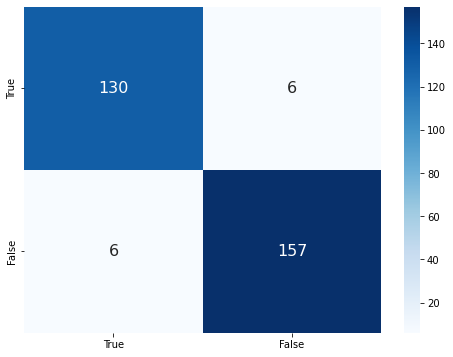

In [17]:
plt.figure(figsize=(8,6))
matrix =confusion_matrix(y_pred,y_test)
matrix=pd.DataFrame(matrix,columns = ['True','False'],index=['True','False'])
sns.heatmap(matrix, annot=True, cmap='Blues',fmt="d",annot_kws={'size':16})


In [19]:
def detect(message):
    message_array = vector.transform(message).toarray()
    return model.predict(message_array)

News = input('Enter the mail content: ')
print(f'Prediction:')


for i in detect([News]):
    if i == 1:
        print('Real')
    else:
        print('Spam')

# Here the users can input a mail content and check if it is real or not.

Enter the mail content: 15-Minute Survey for a Chance to Win a PS5
Prediction:
Spam
